In [15]:
from inspect import cleandoc
from PIL import Image
import cv2
import numpy as np
from sklearn.preprocessing import binarize
import matplotlib.pyplot as plt
import csv

def pretreatment(myImage):
    gray = cv2.cvtColor(myImage, cv2.COLOR_BGR2GRAY)
    cleanedImage = imageClean(gray)
    resizedImage = imageResize(cleanedImage)
    imageBinarized = imageBinarize(resizedImage)
    invertedImage = invertBW(imageBinarized)
    #thinnedImage = imageThin(invertedImage)
    return invertedImage

def imagePretreatment(imagePath):
    myImage = getImage(imagePath)
    return pretreatment(myImage)

def imageBorder(image,percentage=0.05):
    #add 20% white borders to each side of the image
    height, width = image.shape
    white = [255,255,255]
    outputImage = cv2.copyMakeBorder(
                 image, 
                 int(height*percentage), 
                 int(height*percentage), 
                 int(width*percentage), 
                 int(width*percentage), 
                 cv2.BORDER_CONSTANT, 
                 value=white
              )
    return outputImage

def imageResize(image):
    desiredSize = (32, 32)
    output = cv2.resize(image, desiredSize, interpolation=cv2.INTER_CUBIC)
    return output






def imageBinarize(image):
    # imgf contains Binary image
    #return cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 13, 2)
    
    #fixed thresholding 180
    return  cv2.threshold(image, 180, 255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

def imageThin(image):
    kernel = np.ones((2, 2), np.uint8)
    return cv2.erode(image, kernel, iterations=1)


def imageClean(image):
    return cv2.fastNlMeansDenoising(image, None, 5, 7, 21)


def getImage(imagePath):
    # read an image from a path and convert it to grayscale
    image = cv2.imread(imagePath)
    return image


def imageToArray(image):
    imageArray = []
    value = np.asarray(image)
    value = value.flatten()
    imageArray.extend(value)
    return imageArray


def displayImage(img, text=""):
    plt.imshow(img, cmap="gray")
    plt.title(text)
    plt.show()


def invertBW(img):
    return cv2.subtract(255, img)


def equalise(img):
    return cv2.equalizeHist(img)


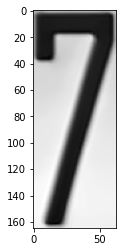

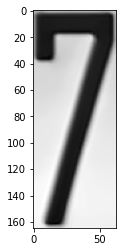

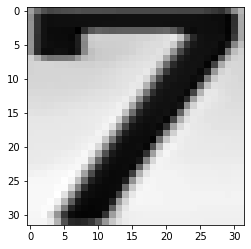

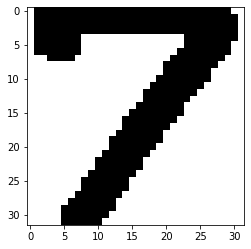

In [17]:
myImage = getImage("/home/pandakin/dev/ocr-moroccan-plates/xgboostAndRF/testing/test/0.jpg")
gray = cv2.cvtColor(myImage, cv2.COLOR_BGR2GRAY)
cleanedImage = imageClean(gray)
displayImage(cleanedImage)
#cleanedImage=imageBorder(cleanedImage,0.2)
displayImage(cleanedImage)

resizedImage = imageResize(cleanedImage)
displayImage(resizedImage)

imageBinarized = imageBinarize(resizedImage)
displayImage(imageBinarized)

invertedImage = invertBW(imageBinarized)
#thinnedImage = imageThin(invertedImage)

